# [Youtube Source Video](https://www.youtube.com/watch?v=dccf_sJF0Gg)

# Dataset Set-Up


In [ ]:
!pip install ultralytics
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="3qduNDzsBSXEa73QGWfB")
project = rf.workspace("hailhydra").project("bd-road-sign-dataset-creation-pznqx")
version = project.version(1)
dataset = version.download("yolov11")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 876.2/876.2 kB 17.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.3/80.3 kB 4.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 3.4 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to BD-Road-Sign-Dataset-Creation-1 in yolov11:: 100%|██████████| 1904/1904 [00:00<00:00, 5562.66it/s]


data.yaml

```
train: ../train/images
val: ../valid/images
test: ../test/images

nc: 28
names: ['Bus Stop', 'Construction Ahead', 'Crossroads Ahead', 'Filling Station Ahead', 'Go Left', 'Go Right', 'Go Slow', 'Hospital Ahead', 'Left Turn', 'Market Ahead', 'Mosque Ahead', 'Narrow Bridge Ahead', 'Narrow Road Ahead', 'Narrow Road on Left Ahead', 'No Horns', 'No-Overtaking', 'Rail Crossing Ahead', 'Right Turn', 'Road On Left', 'Road On Right', 'School Ahead', 'Speed Breaker Ahead', 'Speed Limit 20kmh', 'Speed Limit 40kmh', 'Speed Limit 60kmh', 'Speed Limit 80kmh', 'Stop', 'Street Crossing Ahead']

roboflow:
  workspace: hailhydra
  project: bd-road-sign-dataset-creation-pznqx
  version: 1
  license: CC BY 4.0
  url: https://universe.roboflow.com/hailhydra/bd-road-sign-dataset-creation-pznqx/dataset/1

```

In [ ]:
import yaml

with open('/content/BD-Road-Sign-Dataset-Creation-1/data.yaml', 'r') as f:
  data = yaml.safe_load(f)

print("Number of classes:", len(data['names']))
print("Class names:", data['names'])
print("Training set path:", data['train'])
print("Validation set path:", data['val'])
print("Test set path:", data['test'])

Number of classes: 28
Class names: ['Bus Stop', 'Construction Ahead', 'Crossroads Ahead', 'Filling Station Ahead', 'Go Left', 'Go Right', 'Go Slow', 'Hospital Ahead', 'Left Turn', 'Market Ahead', 'Mosque Ahead', 'Narrow Bridge Ahead', 'Narrow Road Ahead', 'Narrow Road on Left Ahead', 'No Horns', 'No-Overtaking', 'Rail Crossing Ahead', 'Right Turn', 'Road On Left', 'Road On Right', 'School Ahead', 'Speed Breaker Ahead', 'Speed Limit 20kmh', 'Speed Limit 40kmh', 'Speed Limit 60kmh', 'Speed Limit 80kmh', 'Stop', 'Street Crossing Ahead']
Training set path: ../train/images
Validation set path: ../valid/images
Test set path: ../test/images


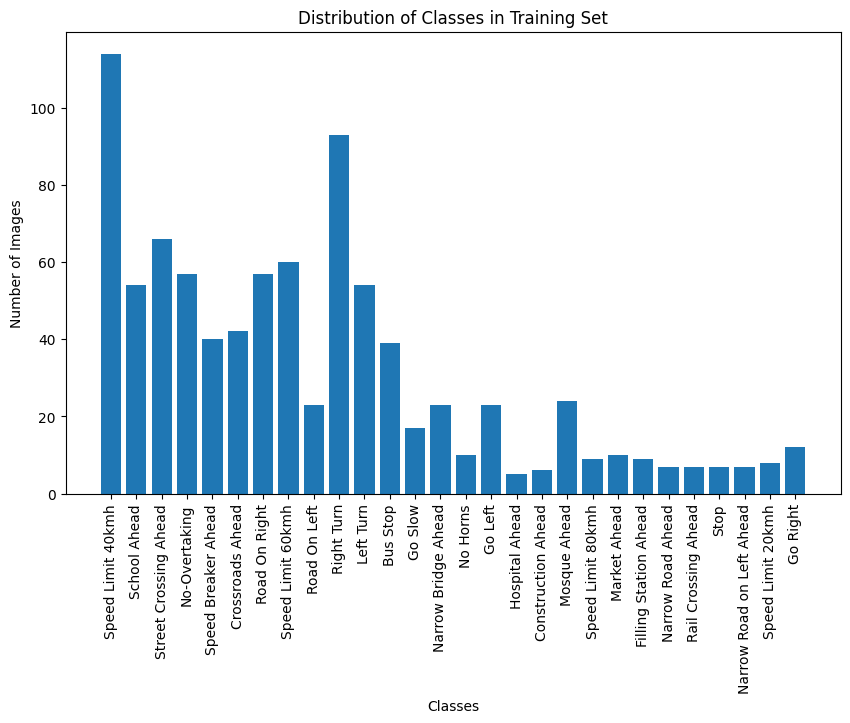

In [ ]:
import os
import matplotlib.pyplot as plt
import yaml

train_folder = "/content/BD-Road-Sign-Dataset-Creation-1/train"
label_folder = os.path.join(train_folder, "labels")

class_counts = {}
for filename in os.listdir(label_folder):
    with open(os.path.join(label_folder, filename), 'r') as f:
        for line in f:
            class_id = int(line.split()[0])
            if class_id not in class_counts:
                class_counts[class_id] = 0
            class_counts[class_id] += 1

with open('/content/BD-Road-Sign-Dataset-Creation-1/data.yaml', 'r') as f:
    data = yaml.safe_load(f)
class_names = data['names']

# Create a bar chart to show the distribution of classes
plt.figure(figsize=(10, 6))
plt.bar(range(len(class_counts)), list(class_counts.values()))
plt.xticks(range(len(class_counts)), [class_names[i] for i in class_counts.keys()], rotation=90)
plt.xlabel("Classes")
plt.ylabel("Number of Images")
plt.title("Distribution of Classes in Training Set")
plt.show()

# YOLOv8n

In [ ]:
# from ultralytics import YOLO

# # # Load a model YOLOv9
# model = YOLO("yolov8n.pt")  # load a pretrained model (recommended for training)

# YOLOv9c


In [ ]:
# from ultralytics import YOLO

# # Load a model YOLOv9
# model = YOLO("yolov9c.pt")  # load a pretrained model (recommended for training)

# YOLOv11n

In [ ]:
from ultralytics import YOLO

# Load a model YOLOv11n
model = YOLO("yolo11n.pt")  # load a pretrained model (recommended for training)

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


100%|██████████| 5.35M/5.35M [00:00<00:00, 76.5MB/s]


In [ ]:
# Train the model with YOLOv9
results = model.train(data="/content/BD-Road-Sign-Dataset-Creation-1/data.yaml", epochs=20, imgsz=640, batch=8)

Ultralytics 8.3.16 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolo11n.pt, data=/content/BD-Road-Sign-Dataset-Creation-1/data.yaml, epochs=20, time=None, patience=100, batch=8, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, sho

100%|██████████| 755k/755k [00:00<00:00, 21.6MB/s]


Overriding model.yaml nc=80 with nc=28

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytic

train: Scanning /content/BD-Road-Sign-Dataset-Creation-1/train/labels... 852 images, 1 backgrounds, 0 corrupt: 100%|██████████| 852/852 [00:00<00:00, 993.82it/s] 

train: New cache created: /content/BD-Road-Sign-Dataset-Creation-1/train/labels.cache


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


A new version of Albumentations is available: 1.4.18 (you have 1.4.15). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/BD-Road-Sign-Dataset-Creation-1/valid/labels... 46 images, 0 backgrounds, 0 corrupt: 100%|██████████| 46/46 [00:00<00:00, 1555.63it/s]

val: New cache created: /content/BD-Road-Sign-Dataset-Creation-1/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000313, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 20 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/20      1.37G     0.8173      4.988      1.057          9        640: 100%|██████████| 107/107 [00:23<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.63it/s]

                   all         46         49     0.0349      0.471     0.0965     0.0838



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/20      1.31G     0.8116      4.256      1.077          7        640: 100%|██████████| 107/107 [00:23<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.75it/s]

                   all         46         49       0.24      0.358      0.202      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/20       1.3G     0.7937      3.812      1.081          3        640: 100%|██████████| 107/107 [00:22<00:00,  4.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.25it/s]

                   all         46         49      0.406      0.409      0.296       0.26



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/20      1.29G     0.7694      3.348      1.052          6        640: 100%|██████████| 107/107 [00:20<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.28it/s]

                   all         46         49      0.433       0.54      0.444      0.384



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/20      1.29G     0.7258       3.19      1.025         12        640: 100%|██████████| 107/107 [00:22<00:00,  4.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.49it/s]

                   all         46         49      0.365      0.421      0.476      0.415



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/20      1.29G     0.7184      2.833      1.032         10        640: 100%|██████████| 107/107 [00:22<00:00,  4.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  6.75it/s]

                   all         46         49      0.752      0.447      0.556      0.481



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/20      1.29G     0.7034      2.651      1.026          6        640: 100%|██████████| 107/107 [00:21<00:00,  4.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.12it/s]

                   all         46         49      0.541      0.641      0.607      0.526



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/20      1.29G     0.6958      2.602      1.016          5        640: 100%|██████████| 107/107 [00:24<00:00,  4.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.81it/s]

                   all         46         49      0.373      0.738      0.613      0.535



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/20      1.29G     0.6774      2.416     0.9978          4        640: 100%|██████████| 107/107 [00:20<00:00,  5.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.13it/s]

                   all         46         49      0.415      0.707      0.623      0.551



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/20      1.28G     0.6565      2.384      1.003          8        640: 100%|██████████| 107/107 [00:21<00:00,  4.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.42it/s]

                   all         46         49      0.731      0.499       0.64      0.573


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/20       1.3G     0.5453      2.384     0.9312          5        640: 100%|██████████| 107/107 [00:21<00:00,  4.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.23it/s]

                   all         46         49      0.428       0.78      0.601      0.532



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/20      1.29G     0.5281      2.214     0.9092          4        640: 100%|██████████| 107/107 [00:19<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.44it/s]

                   all         46         49      0.568       0.75      0.763      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/20      1.29G     0.5114      2.092     0.9116          4        640: 100%|██████████| 107/107 [00:20<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.02it/s]


                   all         46         49      0.597      0.762      0.738      0.674

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/20      1.29G     0.5067      1.974     0.9057          4        640: 100%|██████████| 107/107 [00:21<00:00,  4.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.06it/s]

                   all         46         49      0.656      0.783      0.776      0.707



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/20      1.29G     0.4991      1.939     0.8965          5        640: 100%|██████████| 107/107 [00:19<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.37it/s]

                   all         46         49      0.733      0.806      0.804      0.739



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/20      1.29G     0.4914       1.81      0.902          4        640: 100%|██████████| 107/107 [00:19<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.26it/s]

                   all         46         49       0.74      0.723      0.799      0.719



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/20      1.29G     0.4757      1.792     0.8916          5        640: 100%|██████████| 107/107 [00:21<00:00,  5.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.62it/s]

                   all         46         49      0.596      0.899      0.794      0.725



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/20      1.28G      0.459       1.72     0.8748          4        640: 100%|██████████| 107/107 [00:20<00:00,  5.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.06it/s]

                   all         46         49      0.701      0.866      0.845      0.766



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/20       1.3G     0.4575      1.676      0.868          5        640: 100%|██████████| 107/107 [00:22<00:00,  4.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.14it/s]

                   all         46         49      0.783      0.774      0.847      0.786



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/20      1.29G     0.4486      1.649      0.873          4        640: 100%|██████████| 107/107 [00:20<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.50it/s]

                   all         46         49      0.646      0.905       0.83      0.773



20 epochs completed in 0.129 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.16 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,587,612 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.78it/s]


                   all         46         49      0.783      0.775      0.847      0.786
              Bus Stop          1          1      0.759          1      0.995      0.895
      Crossroads Ahead          2          2      0.567          1      0.663      0.663
               Go Left          2          2      0.883          1      0.995      0.895
               Go Slow          1          1      0.766          1      0.995      0.995
        Hospital Ahead          2          2          1          0      0.507      0.456
             Left Turn          2          2          1      0.768      0.995      0.945
   Narrow Bridge Ahead          1          1          0          0      0.332      0.332
Narrow Road on Left Ahead          2          2          1          0      0.179      0.175
              No Horns          1          1      0.917          1      0.995      0.895
         No-Overtaking          3          3      0.873          1      0.995      0.995
   Rail Crossing A

# Run Model


0: 640x480 6 Speed Limit 40kmhs, 36.5ms
Speed: 4.3ms preprocess, 36.5ms inference, 3.6ms postprocess per image at shape (1, 3, 640, 480)


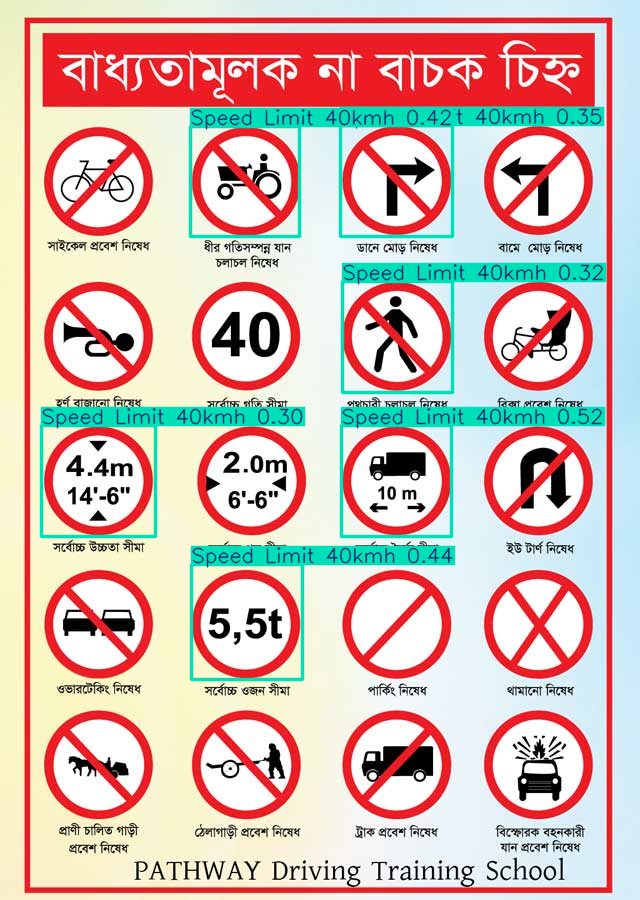

In [ ]:
from ultralytics import YOLO
import cv2
from google.colab.patches import cv2_imshow # Import the correct function for displaying images in Colab

# Load the PyTorch model
model = YOLO('/content/runs/detect/train/weights/best.pt')

# Load the image
image = cv2.imread('/content/compulsory-no-traffic-sign----.jpg')

# Run prediction on the image
results = model.predict(source=image)

# Plot the annotated image
annotated_image = results[0].plot()

# Display the annotated image using cv2_imshow
cv2_imshow(annotated_image) # Use cv2_imshow instead of cv2.imshow
cv2.waitKey(0)
cv2.destroyAllWindows()

# Save/Download Model

In [ ]:
from google.colab import files

# Path to your model weights
model_path = '/content/runs/detect/train/weights/best.pt'

# Download the model
files.download(model_path)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Evaluate Model

In [ ]:
from ultralytics import YOLO

# Load the model
model = YOLO("/content/runs/detect/train/weights/best.pt")

# Run the evaluation
results = model.val(data="/content/BD-Road-Sign-Dataset-Creation-1/data.yaml")

# Print specific metrics
print("Class indices with average precision:", results.ap_class_index)
print("Average precision for all classes:", results.box.all_ap)
print("Mean average precision at IoU=0.50:", results.box.map50)
print("Mean recall:", results.box.mr)

Ultralytics 8.3.16 🚀 Python-3.10.12 torch-2.4.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,587,612 parameters, 0 gradients, 6.3 GFLOPs


val: Scanning /content/BD-Road-Sign-Dataset-Creation-1/valid/labels.cache... 46 images, 0 backgrounds, 0 corrupt: 100%|██████████| 46/46 [00:00<?, ?it/s]
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.81it/s]


                   all         46         49      0.831      0.774      0.847      0.781
              Bus Stop          1          1      0.759          1      0.995      0.895
      Crossroads Ahead          2          2      0.567          1      0.663      0.614
               Go Left          2          2      0.883          1      0.995      0.895
               Go Slow          1          1      0.766          1      0.995      0.995
        Hospital Ahead          2          2          1          0      0.507      0.456
             Left Turn          2          2          1      0.761      0.995      0.945
   Narrow Bridge Ahead          1          1          1          0      0.332      0.332
Narrow Road on Left Ahead          2          2          1          0      0.179      0.175
              No Horns          1          1      0.916          1      0.995      0.895
         No-Overtaking          3          3      0.873          1      0.995      0.995
   Rail Crossing A